In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
def generate_synthetic_data(seed=0, num_samples=100):
    np.random.seed(seed)
    X_data = 2 * np.random.rand(num_samples, 1)
    y_data = 4 + 3 * X_data + np.random.rand(num_samples, 1)
    return X_data, y_data

# Implement linear regression using stochastic gradient descent
def linear_regression_sgd(X, y, learning_rate=0.01, num_epochs=1000):
    n_samples = len(X)
    slope = 0
    intercept = 0

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    for epoch in range(num_epochs):
        for i in range(n_samples):
            random_index = np.random.randint(n_samples)
            X_i, y_i = X[random_index], y[random_index]
            y_pred = slope * X_i + intercept

            # Compute gradients
            slope_gradient = -2 * X_i * (y_i - y_pred)
            intercept_gradient = -2 * (y_i - y_pred)

            # Update parameters
            slope -= learning_rate * slope_gradient
            intercept -= learning_rate * intercept_gradient

        if epoch % 100 == 0:
            y_pred_all = slope * X + intercept
            cost = mean_squared_error(y, y_pred_all)
            print(f"Epoch {epoch}: Cost = {cost}")

    return slope, intercept


Epoch 0: Cost = 0.22283285045647777
Epoch 100: Cost = 0.08503270546215655
Epoch 200: Cost = 0.08514443724913512
Epoch 300: Cost = 0.08572429732759153
Epoch 400: Cost = 0.08962810801421568
Epoch 500: Cost = 0.08837539638527799
Epoch 600: Cost = 0.09459473067667803
Epoch 700: Cost = 0.08573899839803933
Epoch 800: Cost = 0.08497123528213187
Epoch 900: Cost = 0.08496215701060437


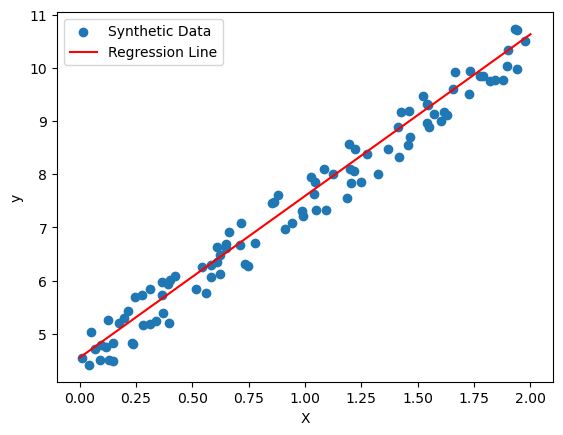

Slope (m): [3.0440422]
Intercept (b): [4.54911619]


In [4]:
# Plot the synthetic data and regression line
def plot_synthetic_data_and_regression(X, y, slope, intercept):
    X_new = np.array([[0], [2]])
    y_pred = intercept + slope * X_new

    plt.scatter(X, y, label='Synthetic Data')
    plt.plot(X_new, y_pred, 'r', label='Regression Line')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    X_data, y_data = generate_synthetic_data(seed=42)
    slope, intercept = linear_regression_sgd(X_data, y_data, learning_rate=0.01, num_epochs=1000)
    plot_synthetic_data_and_regression(X_data, y_data, slope, intercept)
    print("Slope (m):", slope)
    print("Intercept (b):", intercept)